In [5]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd



questa qua sotto è la cella che ha funzionato sotto windows con l'env satellite

In [6]:
#path_in = 'D:\\Dropbox\\R_projects\\SV_phenology\\data\\daily_coarsened\\'
path_in = 'D:\\Dropbox\\R_projects\\SV_phenology\\data\\daily_coarsened\\'
from dask.distributed import Client
client = Client(dashboard_address=':51996')
# for each year (from 1998 to 2022), read in the data (xarray; all data in folder called as year) and smooth as in:
# # smooth ds with a 3 x 3 moving window lungo gli assi x e y e time, riempiendo i valori nulli con la media
# then compute the relative valure (dividing the yearly maximum for each pixel)
# append to a new dataset 

for year in range(1998, 2023):
    print(year)
    # read in the data
    print(path_in + str(year) + '/*.nc')
    ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
    
    # smooth data
    ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean()
    ds_3w = ds_smooth.rolling(time=21, center=True, min_periods=1).mean()
    
    # compute the relative value
    ds_smooth_rel = ds_3w
    
    # append to a new dataset
    if year == 1998:
        ds_smooth_rel_tot = ds_smooth_rel
    else:
        ds_smooth_rel_tot = xr.concat([ds_smooth_rel_tot, ds_smooth_rel], dim='time')
        



# aggiungi doy e calcola la media per ogni doy
ds_smooth_rel_tot['doy'] = ds_smooth_rel_tot.time.dt.dayofyear
ds_smooth_rel_totCLIM = ds_smooth_rel_tot.groupby('doy').mean(dim='time')

# scrivi il file
ds_smooth_rel_totCLIM.to_netcdf('CHL_mean_smoothed.nc')

client.close()

1998
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\1998/*.nc
1999
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\1999/*.nc
2000
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2000/*.nc
2001
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2001/*.nc
2002
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2002/*.nc
2003
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2003/*.nc
2004
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2004/*.nc
2005
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2005/*.nc
2006
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2006/*.nc
2007
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2007/*.nc
2008
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2008/*.nc
2009
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2009/*.nc
2010
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2010/*.nc
2011
D:\Dropbox\R_projects\SV_phenology\data\daily_coarsened\2011/*.nc
2012
D

c:\ProgramData\Anaconda3\envs\satellite\lib\site-packages\xarray\core\accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [3]:
from dask.distributed import Client
client = Client(dashboard_address=':51996')
# dashboard on port 51996 
print(client.dashboard_link )

http://127.0.0.1:51996/status


In [4]:
client.close()

In [6]:
from dask.distributed import Client
import xarray as xr

# Avvia il client Dask
client = Client(dashboard_address=':51996')
# dashboard on port 51996 
print(client.dashboard_link )

path_in = 'D:\\Dropbox\\R_projects\\SV_phenology\\data\\daily_coarsened\\'

# Leggi tutti i dati
ds = xr.open_mfdataset(path_in + '**/*.nc', combine='by_coords', chunks={'time':10, longitude': 100, 'latitude': 100})

# Applica gli algoritmi di smoothing
ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean()
ds_smooth = ds_smooth.persist()  # Persist ds_smooth in memory
ds_3w = ds_smooth.rolling(time=21, center=True, min_periods=1).mean()

# Aggiungi il giorno dell'anno e calcola i valori medi
ds_3w['doy'] = ds_3w['time'].dt.dayofyear
ds_mean = ds_3w.groupby('doy').mean(dim='time')

# Scrivi i valori medi in un file netCDF
ds_mean.to_netcdf('CHL_mean_smoothed.nc')

# Chiusura del client
client.close()

http://127.0.0.1:51996/status


Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.utils_perf.GCDiagnosis object at 0x0000021DF90991C0>>
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\envs\satellite\lib\site-packages\distributed\utils_perf.py", line 179, in _gc_callback
    if info["generation"] != 2:
KeyboardInterrupt: 
c:\ProgramData\Anaconda3\envs\satellite\lib\site-packages\distributed\client.py:3149: UserWarning: Sending large graph of size 299.36 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\satellite\lib\site-packages\xarray\core\accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.utils_perf.GCDiagnosis object at 0x0000021DF90991C0>>
Traceback (most recent cal

In [2]:
path_in =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


# read all the data (in the subfolders) as xarray and combine along the time dimension as dask in 100 x 100 chunks
ds = xr.open_mfdataset(path_in + '**/*.nc', combine='by_coords', chunks={'longitude': 100, 'latitude': 100})
ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean()
ds_3w = ds_smooth.rolling(time=21, center=True, min_periods=1).mean()
 


load one year
(binned dataset as an example)

In [3]:
# attach doy and compute the mean values for each doy
ds_3w['doy'] = ds_3w['time'].dt.dayofyear
ds_mean = ds_3w.groupby('doy').mean(dim='time')

/home/matzuc/miniconda3/envs/svalbard/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [4]:
# write the mean values to a netcdf file
ds_mean.to_netcdf('CHL_mean_smoothed.nc')

: 

In [ ]:
# select doy = 153
temp = ds_mean.sel(doy=90).compute()

temp

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
    doy        int64 90
Data variables:
    CHL        (latitude, longitude) float32 nan nan nan ... 0.3366 0.3732

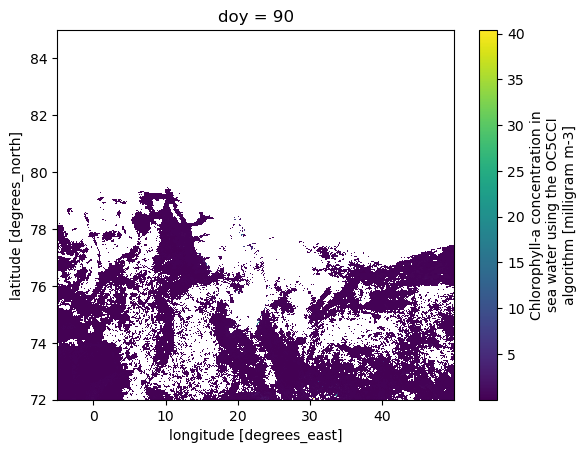

In [ ]:
# plot temp
temp.CHL.plot()

In [15]:
#temp as a matrix
t = temp.CHL.values


In [9]:
# Seleziona la variabile CHL
chl_array = ds_smooth_rel_totCLIM['CHL'].compute()

# Trasforma il DataArray in un formato 2D: (num_punti_spaziali, num_doy)
data_2d = chl_array.stack(point=['latitude', 'longitude']).T

# Rimpiazza i valori nulli con 0
data_2d_filled = data_2d.fillna(0)

# Estrai come un array numpy per ulteriori elaborazioni
data_array = data_2d_filled.values

In [10]:
data_array.shape

(1317888, 246)

In [11]:
# Inizializza il clusterer
clusterer = hdbscan.HDBSCAN(min_samples=50, gen_min_span_tree=True)

# Applica il clustering
labels = clusterer.fit_predict(data_array)

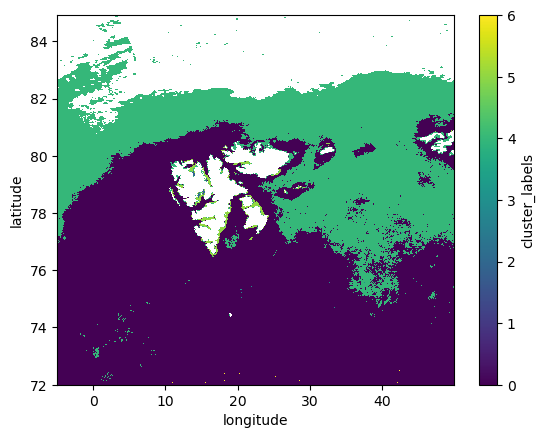

In [14]:
# Assegna le etichette dei cluster al dataset
data_2d_filled['cluster_labels'] = ('point', labels)

# Unstack per ottenere le dimensioni originali (latitude, longitude)
cluster_map = data_2d_filled['cluster_labels'].unstack('point')

# Visualizza la mappa copn colori discreti (non continui)
cluster_map.plot()

In [2]:
from dask.distributed import Client
client = Client() 

import dask.array as da
import xarray as xr

# Carica il tuo dataset come un Dask array
ds_smooth_rel_totCLIM = xr.open_dataset('daily_smoothed_climatology2.nc', chunks={'latitude': 100, 'longitude': 100})

# Estrai la variabile CHL e assicurati che sia un Dask array
chl_array = ds_smooth_rel_totCLIM['CHL'].data

# Assicuriamoci che chl_array sia un Dask array
if not isinstance(chl_array, da.Array):
    chl_array = da.from_array(chl_array, chunks=(246, 100, 100))

# Rimpiazza i NaN con 0
chl_array_filled = da.where(da.isnan(chl_array), 0, chl_array)

# Reshape al formato desiderato
data_2d = chl_array_filled.reshape(chl_array.shape[0], -1).T